In [92]:
## Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Load testing database
import os
path = "..."
os.chdir(path)
df = pd.read_csv("Data_Test\U_A_TestBilbao.csv")

# Separate input and actual target variable
X_test = df[["Uwall", "Uroof", "Uwind", "g_glass","Q_int","Tsp","ACH","SSEcrgd", "Rc"]]
y_test = df['TB_crgd']

# Convert data to DMatrix
test_dmatrix = xg.DMatrix(X_test, y_test)

## Import pre-trainned model
pickled_model = pickle.load(open('model_BIO_TB.pkl', 'rb'))
pred = pickled_model.predict(X_test)

## Error calculation
rmse = np.sqrt(MSE(y_test, pred))
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)
print(f'MAE = {mae}')
print(f'MAPE = {mape}')
print(f'RMSE = {rmse}')


MAE = 4.017066795885428
MAPE = 0.7076613370689621
RMSE = 4.111551960326592


In [93]:
## Merge real value, prediction and case code

# Collect necessary data
Bld_case = df['Casos']
RealTB = np.array(y_test)
PredTB = np.array(pred) 

# Calculate error
Error = np.subtract(y_test, pred)

# Append all values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    dframe = pd.DataFrame(Bld_case)
    dframe['Real TB'] = list(RealTB)
    dframe['Prediction'] = list(PredTB)
    dframe['Error'] = list(Error)
    
    
# Export prediction result
result = dframe
result.to_csv(r'Result\BIO_TB_testMAD.csv')
print ('Prediction result is exported')

Prediction result is exported


max y=  20.762516021728516
min y=  3.526644706726074
max x=  17.19
min x=  -0.15
Regression line m and b:  1.0120027875328836 and 3.91414248453287
Prediction graph is saved


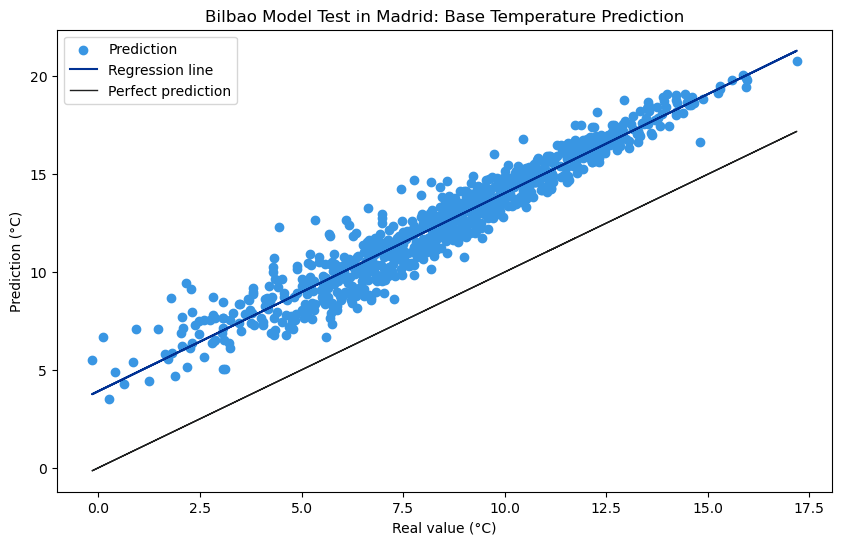

In [94]:
## Plot: real and predicted values  (unit: kWh)

source = result

# Define source, x and y data
# source = result
x1 = source['Real TB']
y1 = source['Prediction']

# Data check
print('max y= ', y1.max())
print('min y= ', y1.min())
print('max x= ', x1.max())
print('min x= ', x1.min())

# Set graph size
fig = plt.figure(figsize =(10,6))

# Adjust x-axis to be at y=0
ax = fig.add_subplot(1, 1, 1)
#ax.spines['bottom'].set_position('zero')

# Plot the data
plt.scatter(x1, y1, c='#3996e3', label='Prediction')
#plt.xlim(0,900000)

# Set axis label and title
plt.xlabel("Real value (°C)")
plt.ylabel("Prediction (°C)")
plt.title("Bilbao Model Test in Madrid: Base Temperature Prediction")

# Create regression line
m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1+b , c='#013294', lw=1.5, label='Regression line')
print ('Regression line m and b: ', m,'and', b)

# Create perfect prediction line (m=1)
plt.plot(x1, x1 , c='#202121', lw=1, label='Perfect prediction')

ax.legend()

# Export graph
plt.savefig(r'Result\BIO_TB_testMAD_Prediction.png', format="png", dpi=800)
print ('Prediction graph is saved')


max y=  -1.0902632713317875
min y=  -7.847683486938476
max x=  17.19
min x=  -0.15
Error graph is saved


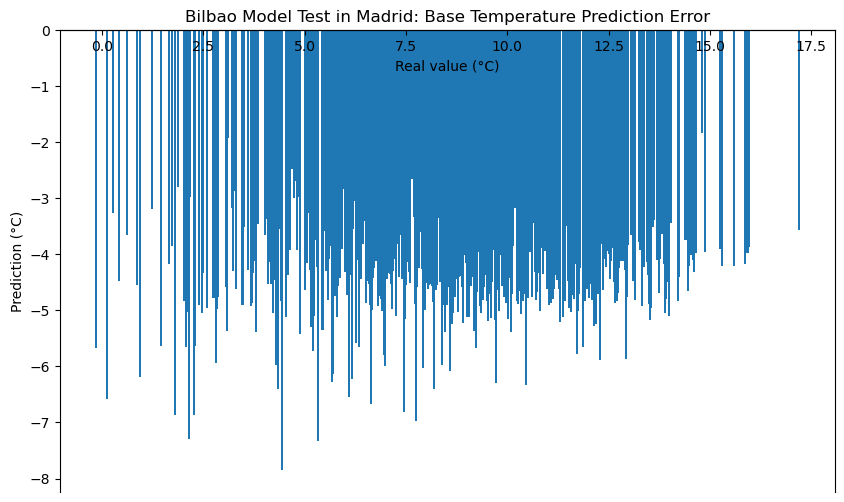

In [95]:
## Plot: prediction error and real value (unit: kWh)

# Define x and y data
# Error = real - prediction
x2 = source['Real TB']
y2 = source['Error']

# Data check
print('max y= ', y2.max())
print('min y= ', y2.min())
print('max x= ', x2.max())
print('min x= ', x2.min())

# Set graph size
fig = plt.figure(figsize =(10,6))

# Adjust x-axis to be at y=0
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('zero')

# Plot the data
plt.bar(x2, y2, width=0.05)
#plt.xlim(0,900000)
#plt.ylim(-350000, 350000)

# Set axis label and title
plt.xlabel("Real value (°C)")
plt.ylabel("Prediction (°C)")
plt.title("Bilbao Model Test in Madrid: Base Temperature Prediction Error")

# Export graph
plt.savefig(r'Result\BIO_TB_testMAD_Error.png', format="png", dpi=800)
print ('Error graph is saved')